In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [18]:
file_path = r"C:\Users\mkiarie\Documents\DATA SCIENCE WANJA\raw-data.csv"

data = pd.read_csv(file_path)
odata = pd.read_csv(file_path)

C:\Users\mkiarie\AppData\Local\Temp\ipykernel_7896\2051849820.py:3: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\mkiarie\AppData\Local\Temp\ipykernel_7896\2051849820.py:4: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  odata = pd.read_csv(file_path)


In [19]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      119528 non-null  int64  
 1   V2      119528 non-null  int64  
 2   V3      119528 non-null  int64  
 3   V4      85048 non-null   float64
 4   V5      85048 non-null   float64
 5   V6      85048 non-null   float64
 6   V7      85048 non-null   float64
 7   V8      85048 non-null   float64
 8   V9      85048 non-null   float64
 9   V10     85048 non-null   object 
 10  V11     85048 non-null   float64
 11  V12     85048 non-null   float64
 12  V13     85048 non-null   object 
 13  V14     85048 non-null   object 
 14  V15     84131 non-null   object 
 15  V16     85048 non-null   object 
 16  V17     85048 non-null   float64
 17  V18     119528 non-null  int64  
 18  V19     119528 non-null  int64  
 19  V20     119528 non-null  int64  
 20  V21     36626 non-null   float64
 21  V22     11

In [21]:
cols= data.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32'],
      dtype='object')

In [22]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,V32
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [23]:
print(data.dtypes)

V1       int64
V2       int64
V3       int64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10     object
V11    float64
V12    float64
V13     object
V14     object
V15     object
V16     object
V17    float64
V18      int64
V19      int64
V20      int64
V21    float64
V22      int64
V23    float64
V24    float64
V25    float64
V26    float64
V27    float64
V28      int64
V29      int64
V30      int64
V31     object
V32      int64
dtype: object


In [24]:
#checking on the distribution of the data

numeric_columns = (data.select_dtypes(include=[np.number]).columns)

print(numeric_columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V12',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'V30', 'V32'],
      dtype='object')


# Data cleaning

In [25]:
#HANDLING THE MIXED TYPES OF DATA
num_cols = (data.select_dtypes(include=[np.number]).columns)
categorical_cols = data.select_dtypes(include=[object]).columns

print(num_cols, categorical_cols)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V12',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'V30', 'V32'],
      dtype='object') Index(['V10', 'V13', 'V14', 'V15', 'V16', 'V31'], dtype='object')


In [26]:

# Identify mixed types in columns
for column in data.columns:
    unique_types = data[column].apply(type).nunique()
    if unique_types > 1:
        print(f'Column {column} has mixed types')


Column V10 has mixed types
Column V13 has mixed types
Column V14 has mixed types
Column V15 has mixed types
Column V16 has mixed types


In [27]:
# Handle mixed types by converting columns that should be numeric to numeric, forcing errors to NaN

cols_with_mixed_types = ['V10', 'V13', 'V14', 'V15', 'V16']
data[cols_with_mixed_types] = data[cols_with_mixed_types].apply(pd.to_numeric, errors='coerce')


MISSING DATA

In [28]:
missing_data = data.isnull().mean()*100
missing_data


V1       0.000000
V2       0.000000
V3       0.000000
V4      28.846797
V5      28.846797
V6      28.846797
V7      28.846797
V8      28.846797
V9      28.846797
V10    100.000000
V11     28.846797
V12     28.846797
V13    100.000000
V14    100.000000
V15    100.000000
V16    100.000000
V17     28.846797
V18      0.000000
V19      0.000000
V20      0.000000
V21     69.357807
V22      0.000000
V23     83.869052
V24     84.080717
V25     12.600395
V26     88.763302
V27     82.905261
V28      0.000000
V29      0.000000
V30      0.000000
V31      0.000000
V32      0.000000
dtype: float64

<Axes: >

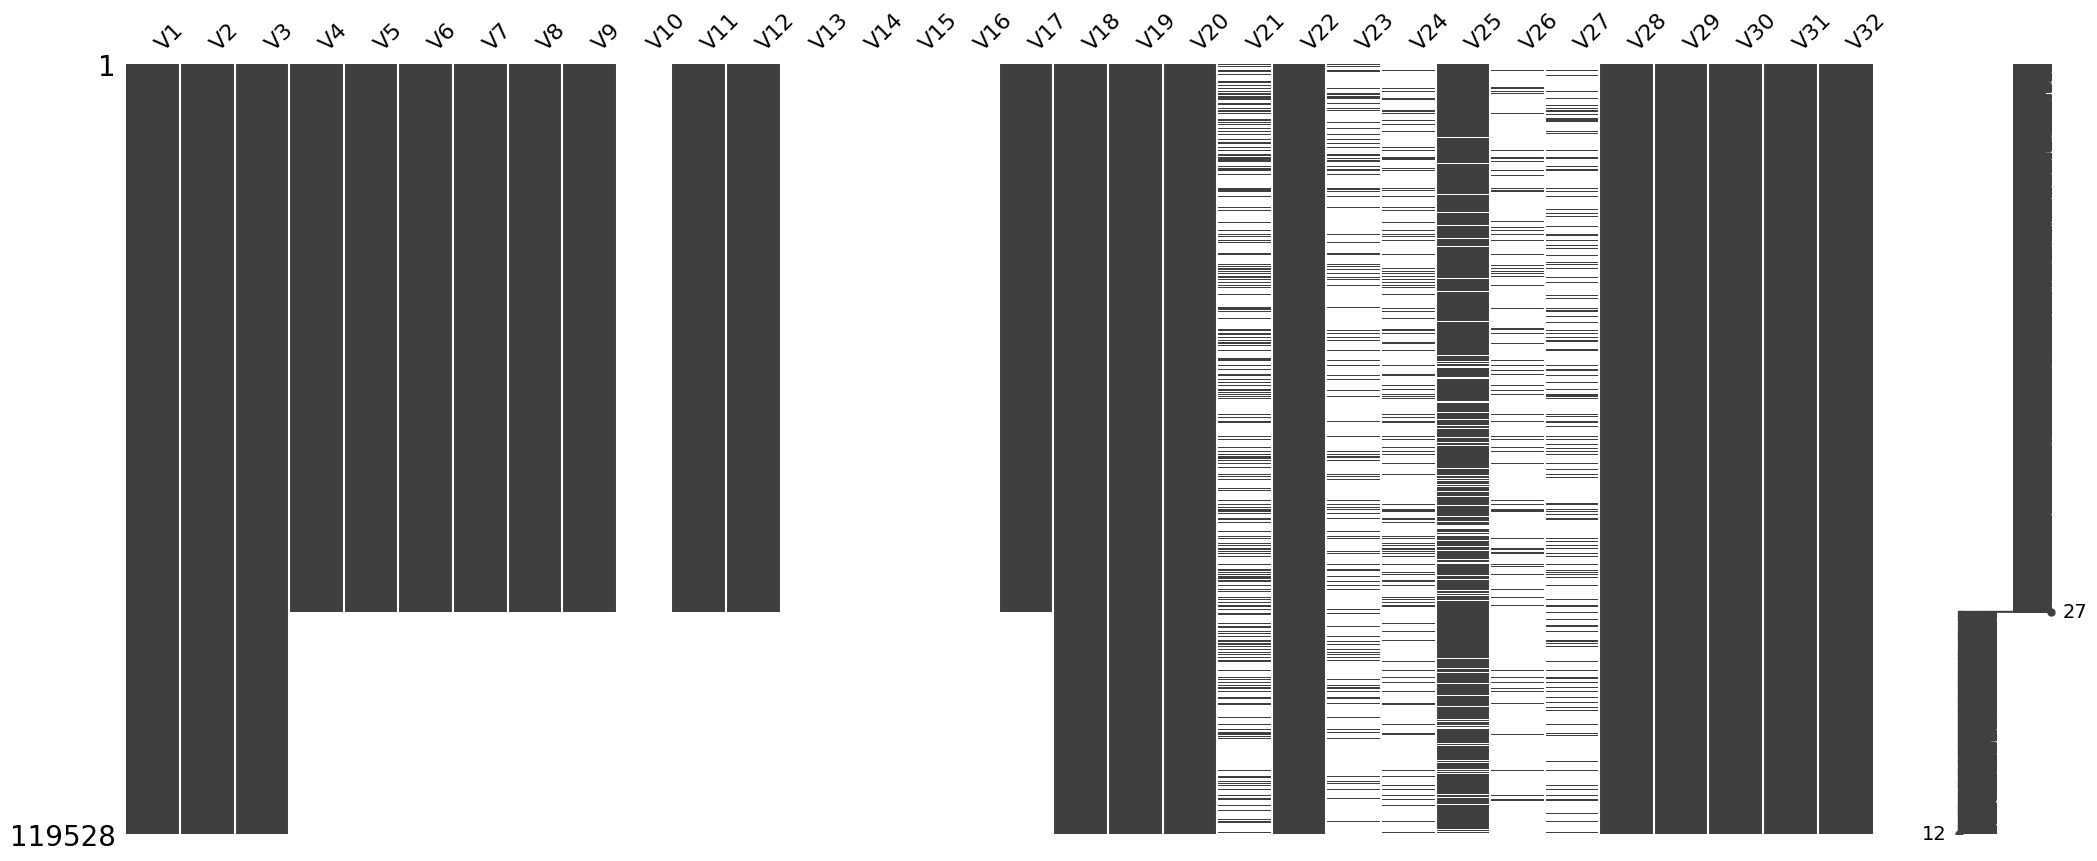

In [29]:
msno.matrix(data)

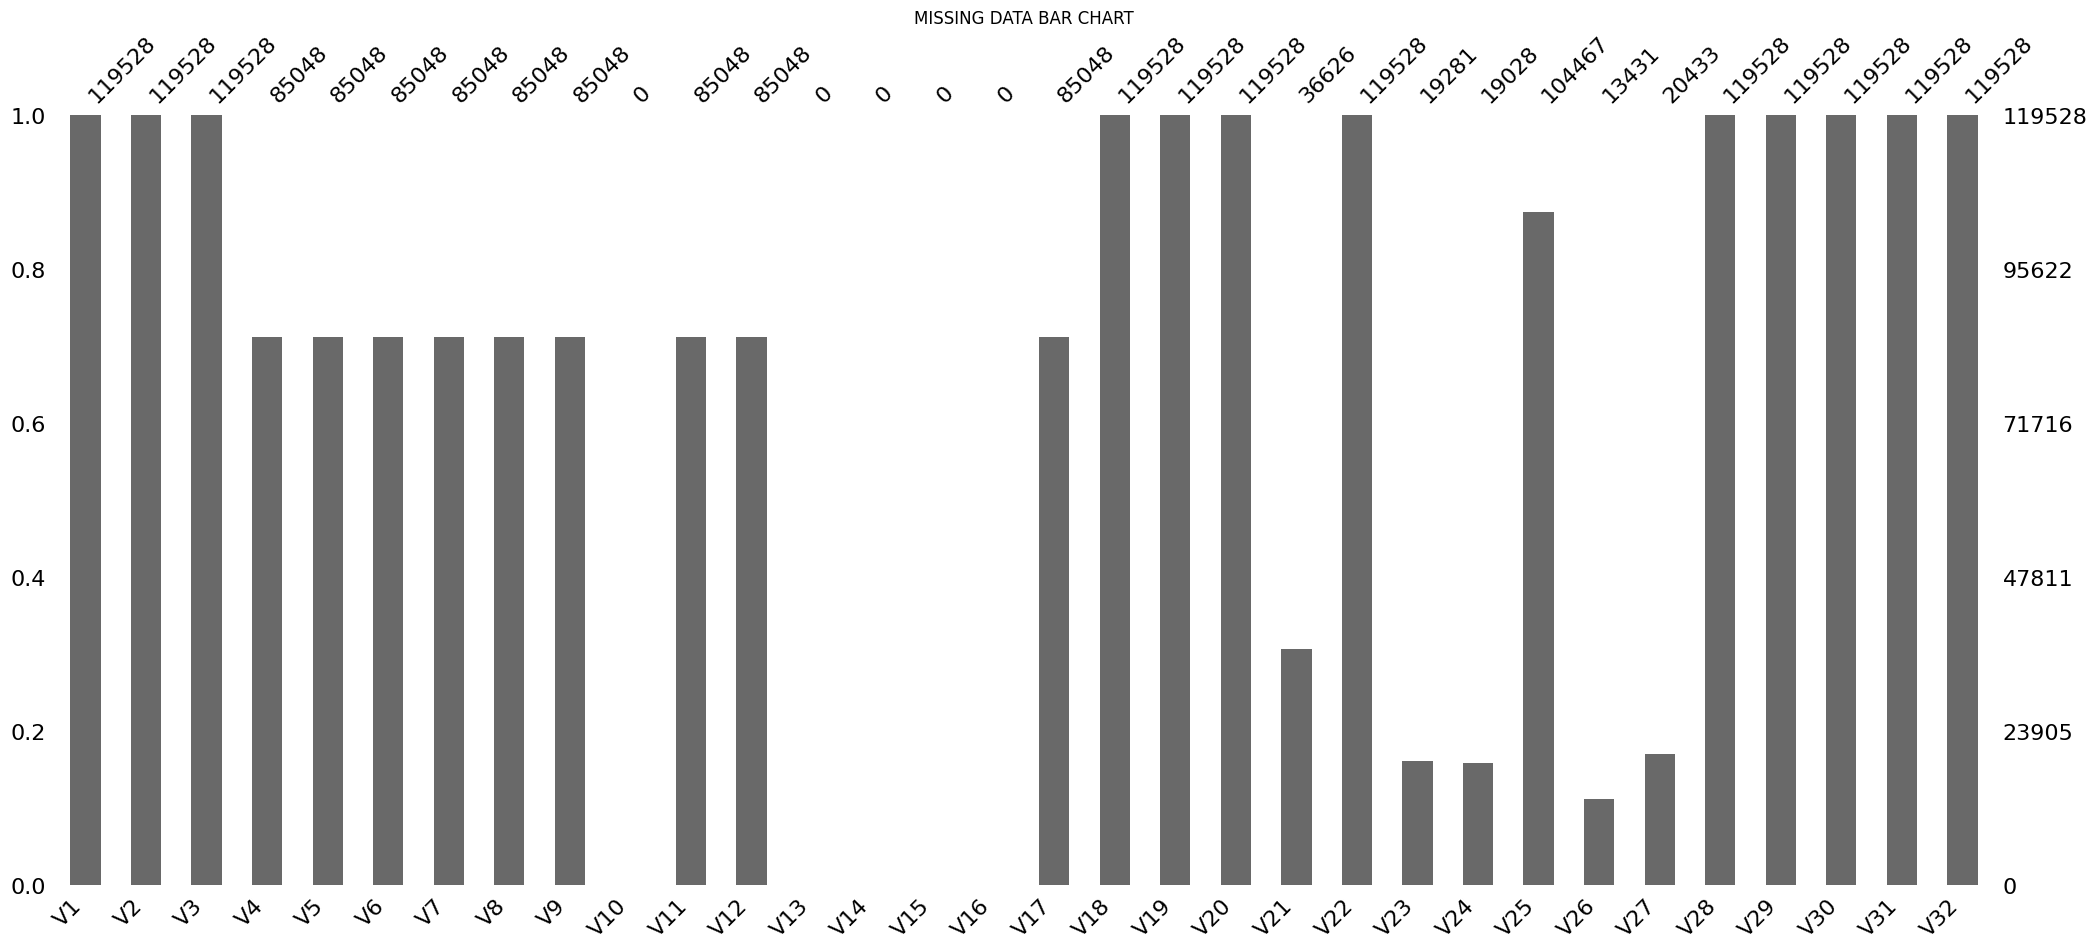

In [30]:
plt.figure(figsize=(14,8))
msno.bar(data)


plt.title('MISSING DATA BAR CHART')
plt.show()

HANDLING THE MISSING DATA

Remove Columns with 100% Missing Values: These columns (V10, V13, V14, V15, V16) will be dropped since they do not provide any useful info

In [31]:
# Drop columns with 100% missing values
cols_to_drop = ['V10', 'V13', 'V14', 'V15', 'V16']
data_cleaned = data.drop(columns=cols_to_drop)
data_cleaned

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,2.0,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0.0,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,119524,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3,0
119524,119525,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33000.0,NaN,NaN,3,1,0,TIER 3,1
119525,119526,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3,0
119526,119527,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31990.0,43600.0,NaN,13.0,0,0,0,TIER 1,0


In [32]:
#this is percentage if missingness from the remaining data that has not been dropped
#creating a threshold so at to be able to handle the data
#dc=data cleaned
dc_missing = data_cleaned.isnull().mean()*100
dc_missing.info()

<class 'pandas.core.series.Series'>
Index: 27 entries, V1 to V32
Series name: None
Non-Null Count  Dtype  
--------------  -----  
27 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB
